In [1]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential,Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib

In [28]:
img_height=300
img_width=300
input_shape = (img_height,img_width, 3)

train_datagenerator = ImageDataGenerator(rescale = 1./255)

validation_datagenerator = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagenerator.flow_from_directory('/kaggle/input/image-processing/train-20230326T152931Z-001/train', batch_size = 32, class_mode='categorical', target_size=(img_height, img_width))

validation_generator = validation_datagenerator.flow_from_directory('/kaggle/input/image-processing/val-20230326T152503Z-001/val', batch_size = 1, class_mode='categorical', target_size=(img_height, img_width), shuffle=True)

test_generator = validation_datagenerator.flow_from_directory('/kaggle/input/image-processing/test-20230326T155708Z-001/test', batch_size = 1, class_mode='categorical', target_size=(img_height, img_width))


Found 9971 images belonging to 6 classes.
Found 1962 images belonging to 6 classes.
Found 1966 images belonging to 6 classes.


In [67]:
img_height=300
img_width=300
input_shape = (img_height,img_width, 3)

train_datagenerator = ImageDataGenerator(rescale = 1./255)

validation_datagenerator = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagenerator.flow_from_directory('/kaggle/input/image-processing/train-20230326T152931Z-001/train', batch_size = 32, class_mode='sparse', target_size=(img_height, img_width))

validation_generator = validation_datagenerator.flow_from_directory('/kaggle/input/image-processing/val-20230326T152503Z-001/val', batch_size = 1, class_mode='sparse', target_size=(img_height, img_width), shuffle=True)

test_generator = validation_datagenerator.flow_from_directory('/kaggle/input/image-processing/test-20230326T155708Z-001/test', batch_size = 1, class_mode='sparse', target_size=(img_height, img_width))


Found 9971 images belonging to 6 classes.
Found 1962 images belonging to 6 classes.
Found 1966 images belonging to 6 classes.


In [3]:
import tensorflow as tf
classifier2 = tf.keras.models.Sequential()

In [4]:
classifier2.add(tf.keras.layers.Conv2D(filters=32,
                                     kernel_size=3, 
                                     padding="same", 
                                     activation="relu", 
                                     input_shape=[300, 300, 3]))
classifier2.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))
classifier2.add(tf.keras.layers.Conv2D(filters=32, 
                                      kernel_size=3, 
                                      padding="same", 
                                      activation="relu"))

classifier2.add(tf.keras.layers.MaxPool2D(pool_size=2, 
                                         strides=2, 
                                         padding='valid'))
classifier2.add(tf.keras.layers.Flatten())
classifier2.add(tf.keras.layers.Dense(units=300, 
                                     activation='relu'))
classifier2.add(tf.keras.layers.Dropout(0.40))
classifier2.add(tf.keras.layers.Dense(units=96, activation='relu'))
classifier2.add(tf.keras.layers.Dropout(0.40))
classifier2.add(tf.keras.layers.Dense(units=64, activation='relu'))
classifier2.add(tf.keras.layers.Dense(units=6, activation='softmax')) # softmax for more than 2
classifier2.compile(optimizer = 'adam', 
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])
# classifier2.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])

classifier2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 300, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 150, 150, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 180000)            0         
                                                                 
 dense (Dense)               (None, 300)               5

In [7]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [8]:
h = classifier2.fit(train_generator,steps_per_epoch = 150, epochs = 30,callbacks=[early_stop], validation_data = validation_generator)

Epoch 1/30
150/150 [==============================] - 160s 993ms/step - loss: 1.3728 - accuracy: 0.4844 - val_loss: 0.8446 - val_accuracy: 0.6784
Epoch 2/30
150/150 [==============================] - 115s 765ms/step - loss: 0.7673 - accuracy: 0.7069 - val_loss: 0.5993 - val_accuracy: 0.7712
Epoch 3/30
150/150 [==============================] - 106s 711ms/step - loss: 0.6517 - accuracy: 0.7542 - val_loss: 0.4841 - val_accuracy: 0.8196
Epoch 4/30
150/150 [==============================] - 96s 640ms/step - loss: 0.5014 - accuracy: 0.8177 - val_loss: 0.4428 - val_accuracy: 0.8379
Epoch 5/30
150/150 [==============================] - 93s 618ms/step - loss: 0.4224 - accuracy: 0.8488 - val_loss: 0.4063 - val_accuracy: 0.8456
Epoch 6/30
150/150 [==============================] - 89s 593ms/step - loss: 0.3551 - accuracy: 0.8754 - val_loss: 0.3818 - val_accuracy: 0.8619
Epoch 7/30
150/150 [==============================] - 89s 593ms/step - loss: 0.3159 - accuracy: 0.8902 - val_loss: 0.3893 - val

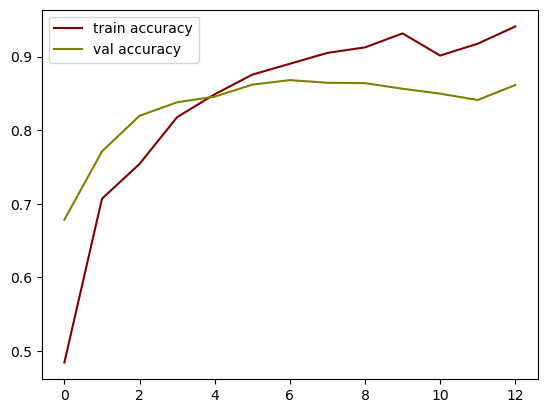

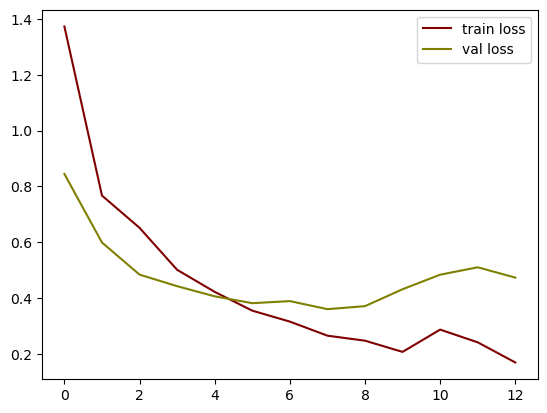

In [9]:
plt.plot(h.history['accuracy'], label='train accuracy',color='Maroon')

plt.plot(h.history['val_accuracy'], label='val accuracy',color='Olive')

plt.legend()

plt.savefig('vgg-acc-md-1.png')

plt.show()
# loss
plt.plot(h.history['loss'], label='train loss',color='Maroon')
plt.plot(h.history['val_loss'], label='val loss',color='Olive')
plt.legend()
plt.savefig('vgg-loss-md-1.png')
plt.show()

In [10]:
classifier2.evaluate(test_generator,batch_size=32)

62/62 [==============================] - 44s 719ms/step - loss: 0.4711 - accuracy: 0.8774


[0.47110944986343384, 0.8774160742759705]

In [29]:
X_test,Y_test=test_generator.next()

In [69]:
import pandas as pd
import seaborn as sn
import tensorflow as tf 
import numpy as np

# model=loaded_model
filenames=test_generator.filenames
nb_samples=len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test=test_generator.next()
#   y_prob.append(classifier2.predict(X_test))
  y_act.append(Y_test)


In [70]:
# predicted_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


In [65]:
actual_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

In [66]:
actual_class

['CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY',
 'CARDIOMEGALY

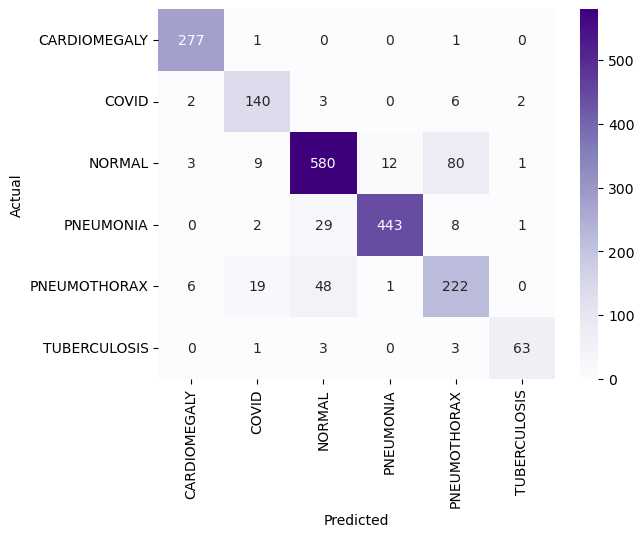

Test accuracy:87.74160732451679


In [45]:
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

img=sn.heatmap(confusion_matrix,cmap='Purples',annot=True,fmt='d')
plt.show()
print('Test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(predicted_class,actual_class))
#get confusion matrix
cm = confusion_matrix(predicted_class,actual_class)
print(cm)

              precision    recall  f1-score   support

CARDIOMEGALY       0.99      0.96      0.98       288
       COVID       0.92      0.81      0.86       172
      NORMAL       0.85      0.87      0.86       663
   PNEUMONIA       0.92      0.97      0.94       456
PNEUMOTHORAX       0.75      0.69      0.72       320
TUBERCULOSIS       0.90      0.94      0.92        67

    accuracy                           0.88      1966
   macro avg       0.89      0.88      0.88      1966
weighted avg       0.88      0.88      0.88      1966

[[277   2   3   0   6   0]
 [  1 140   9   2  19   1]
 [  0   3 580  29  48   3]
 [  0   0  12 443   1   0]
 [  1   6  80   8 222   3]
 [  0   2   1   1   0  63]]


In [72]:
img_height=224
img_width=224
input_shape = (img_height,img_width, 3)

train_datagenerator = ImageDataGenerator(rescale = 1./255)

validation_datagenerator = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagenerator.flow_from_directory('/kaggle/input/image-processing/train-20230326T152931Z-001/train', batch_size = 32, class_mode='sparse', target_size=(img_height, img_width))

validation_generator = validation_datagenerator.flow_from_directory('/kaggle/input/image-processing/val-20230326T152503Z-001/val', batch_size = 1, class_mode='categorical', target_size=(img_height, img_width), shuffle=True)

test_generator = validation_datagenerator.flow_from_directory('/kaggle/input/image-processing/test-20230326T155708Z-001/test', batch_size = 1, class_mode='categorical', target_size=(img_height, img_width))


Found 9971 images belonging to 6 classes.
Found 1962 images belonging to 6 classes.
Found 1966 images belonging to 6 classes.


In [43]:
resnet="https://kaggle.com/models/tensorflow/resnet-50/frameworks/TensorFlow2/variations/feature-vector/versions/1"
resnet_model=hub.KerasLayer(resnet, input_shape=(224, 224, 3),trainable=False)
num_of_classes = 6
model = tf.keras.Sequential([
  resnet_model,
  tf.keras.layers.Dense(num_of_classes)
])


In [6]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [44]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['acc'])
history=model.fit(train_generator, epochs=30,batch_size=32,callbacks=[early_stop],validation_data=validation_generator)

Epoch 1/30
312/312 [==============================] - 196s 602ms/step - loss: 0.4425 - acc: 0.8487 - val_loss: 0.3211 - val_acc: 0.8919
Epoch 2/30
312/312 [==============================] - 185s 594ms/step - loss: 0.2751 - acc: 0.9085 - val_loss: 0.2753 - val_acc: 0.9062
Epoch 3/30
312/312 [==============================] - 181s 580ms/step - loss: 0.2358 - acc: 0.9213 - val_loss: 0.3490 - val_acc: 0.8649
Epoch 4/30
312/312 [==============================] - 181s 582ms/step - loss: 0.2110 - acc: 0.9308 - val_loss: 0.2714 - val_acc: 0.9047
Epoch 5/30
312/312 [==============================] - 184s 591ms/step - loss: 0.1926 - acc: 0.9370 - val_loss: 0.2309 - val_acc: 0.9271
Epoch 6/30
312/312 [==============================] - 184s 590ms/step - loss: 0.1821 - acc: 0.9408 - val_loss: 0.2281 - val_acc: 0.9195
Epoch 7/30
312/312 [==============================] - 181s 581ms/step - loss: 0.1681 - acc: 0.9455 - val_loss: 0.2198 - val_acc: 0.9266
Epoch 8/30
312/312 [============================

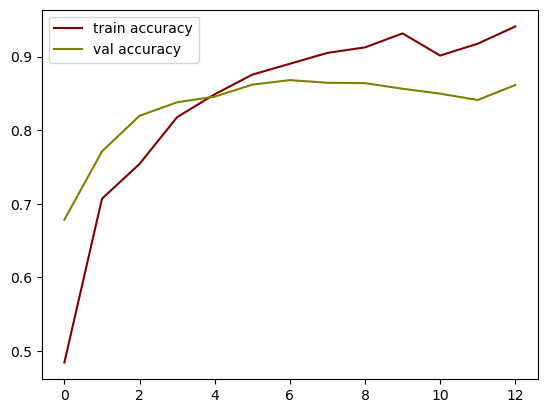

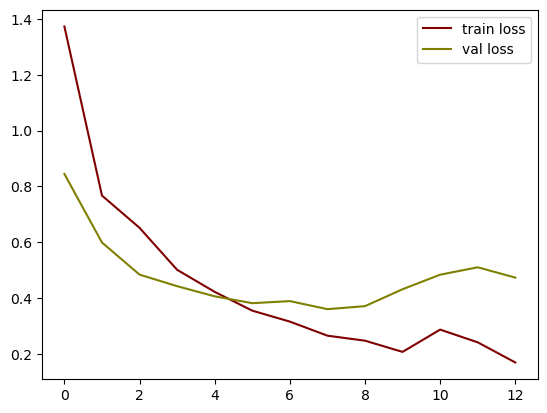

In [46]:
plt.plot(h.history['accuracy'], label='train accuracy',color='Maroon')

plt.plot(h.history['val_accuracy'], label='val accuracy',color='Olive')

plt.legend()

plt.savefig('vgg-acc-md-1.png')

plt.show()
# loss
plt.plot(h.history['loss'], label='train loss',color='Maroon')
plt.plot(h.history['val_loss'], label='val loss',color='Olive')
plt.legend()
plt.savefig('vgg-loss-md-1.png')
plt.show()

In [47]:
model.evaluate(test_generator,batch_size=1)

1966/1966 [==============================] - 43s 22ms/step - loss: 0.2815 - acc: 0.9120


[0.2815181314945221, 0.9120040535926819]

In [74]:
X_test,Y_test=test_generator.next()

In [75]:
X_test.shape

(1, 224, 224, 3)

In [76]:
import pandas as pd
import seaborn as sn
import tensorflow as tf 
import numpy as np

# model=loaded_model
filenames=test_generator.filenames
nb_samples=len(test_generator)
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test=test_generator.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

1/1 [==============================] - 0s 30ms/step


In [77]:
predicted_class=[]
actual_class=[]
predicted_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class=[list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]

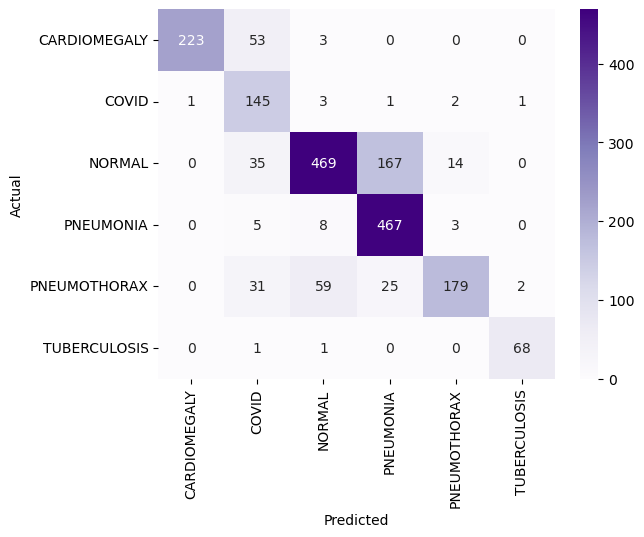

Test accuracy:78.8911495422177


In [79]:
out_df=pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix=pd.crosstab(out_df['actual_class'],out_df['predicted_class'],rownames=['Actual'],colnames=['Predicted'])

img=sn.heatmap(confusion_matrix,cmap='Purples',annot=True,fmt='d')
plt.show()
print('Test accuracy:{}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

In [81]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(predicted_class,actual_class))
#get confusion matrix
cm = confusion_matrix(predicted_class,actual_class)
print(cm)

              precision    recall  f1-score   support

CARDIOMEGALY       0.80      1.00      0.89       224
       COVID       0.95      0.54      0.69       270
      NORMAL       0.68      0.86      0.76       543
   PNEUMONIA       0.97      0.71      0.82       660
PNEUMOTHORAX       0.60      0.90      0.72       198
TUBERCULOSIS       0.97      0.96      0.96        71

    accuracy                           0.79      1966
   macro avg       0.83      0.83      0.81      1966
weighted avg       0.83      0.79      0.79      1966

[[223   1   0   0   0   0]
 [ 53 145  35   5  31   1]
 [  3   3 469   8  59   1]
 [  0   1 167 467  25   0]
 [  0   2  14   3 179   0]
 [  0   1   0   0   2  68]]
